### Observable trends for a fictional ride sharing company
* Urban areas represented the largest portion of this data with the largest totals by far for fares, rides, and drivers. Suburban areas came in at second with rural areas trailing behind. 


* This trend also held up with the total number of rides per city with their respective city type of urban, suburban and rural.  


* However, a the opposite is true for average fare by city. The fare on average was higher in rural cities, lower in urban cities, with suburban cites being in the middle. 


* There does not seem to be a correlation between driver count in a city and average fare. Distance driven was not included in the data but it would probably show a correlation. 

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load in the two cvs files
city = "Resources/city_data.csv"
city_df = pd.read_csv(city)

ride = "Resources/ride_data.csv"
ride_df = pd.read_csv(ride)

In [3]:
#find out if there are dups in the columns that should be unique
def dup(df, column_name):
    dup_check = df.duplicated(column_name)
    if True in dup_check.values:
        print(f"There's at least one dup in the '{column_name}' column.")
    else:
        print(f"There are no dups in the '{column_name}' column.")

#test        
dup(city_df, "city")
dup(ride_df, "ride_id")

There's at least one dup in the 'city' column.
There are no dups in the 'ride_id' column.


In [4]:
#Since there is at least one duplicate value in the city column of the city_df,
#drop any duplicates 
#(IRL would check to see why Port James is in there twice w/ 2 different driver counts)
city_df = city_df.drop_duplicates(['city'], keep='first')

#double check
dup(city_df, "city")

There are no dups in the 'city' column.


In [5]:
#merge the two df on "city" keeping everything
combi_df = pd.merge(ride_df, city_df, on="city", how="outer")
combi_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [6]:
'''Per City: Average Fare, Total Rides, Total Drivers, City Type'''

#group by city and type
city_grp = combi_df.groupby(['city', 'type'])

#find the average fare per city
city_avg_fare = city_grp['fare'].mean()

#total rides per city
city_rides = city_grp['ride_id'].count()

#total drivers per city (mean is used because all the numbers are the same)
city_drivers = city_grp['driver_count'].mean()

#make the df
bubble_df = pd.DataFrame({"Average Fare ($)": city_avg_fare, 
                          "Total Number of Rides (Per City)": city_rides, 
                          "Driver Count": city_drivers})

#make the type index a column
bubble_df = bubble_df.reset_index(level='type')

#rename the type column
bubble_df = bubble_df.rename(columns={"type": "City Types"})

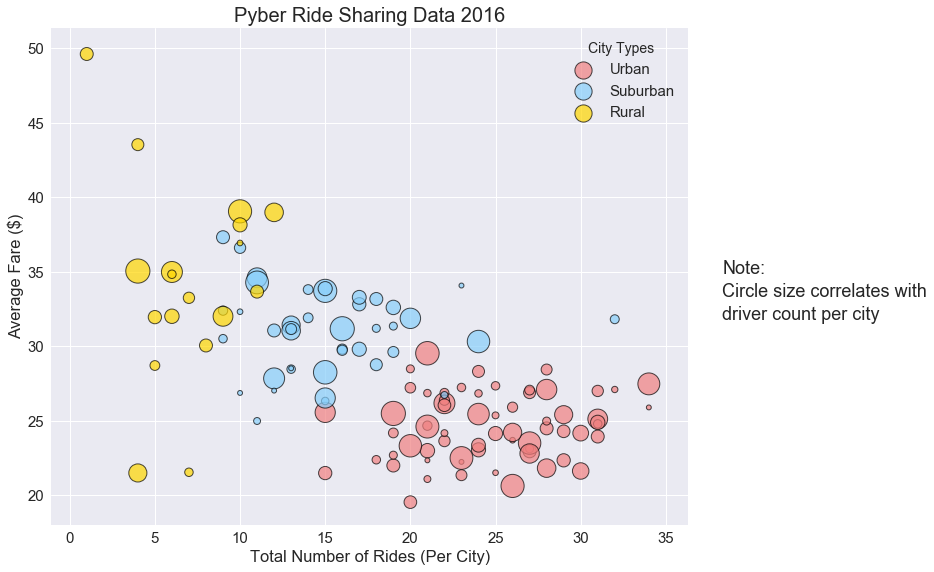

In [7]:
'''Make the bubble plot showing the relationship b/t the 4 key variables'''

#make the font scale larger
sns.set(font_scale=1.5)

#make a list containing Pyber's color scheme
p_clrs = ['gold', 'lightskyblue', 'lightcoral']

#make the plot
bubble_plot = sns.lmplot(x='Total Number of Rides (Per City)', y='Average Fare ($)', data=bubble_df, fit_reg=False, 
            scatter_kws={'s':(bubble_df['Driver Count'] * 8), 'alpha':0.7, 'linewidths':1, 'edgecolor':'k'}, 
            legend_out=False, palette=dict(Rural=p_clrs[0], Suburban=p_clrs[1], Urban=p_clrs[2]), 
            hue='City Types', size=8, aspect=1.25)

#set the title
plt.title('Pyber Ride Sharing Data 2016', fontsize=20)

#make a note on the side
bubble_plot.fig.text(1.02, .54, 'Note:')
bubble_plot.fig.text(1.02, .5, 'Circle size correlates with')
bubble_plot.fig.text(1.02, .46, 'driver count per city')

plt.show()

In [8]:
#make a function that makes the pie charts
def pie_maker(pie_data, pie_title):
    #make the figure size in inches
    fig = plt.figure(figsize=(10, 10))
    #make the pie chart
    plt.pie(pie_data, labels= type_grp.groups, explode=(0, 0, .08), autopct="%1.1f%%", 
        colors=p_clrs, shadow=True, startangle=300, radius=1.2, 
        wedgeprops={'linewidth':1,'edgecolor':"grey" }, textprops={'fontsize':14})
    #add the title
    plt.title(pie_title, fontsize=22)
    #show the plot
    plt.show()

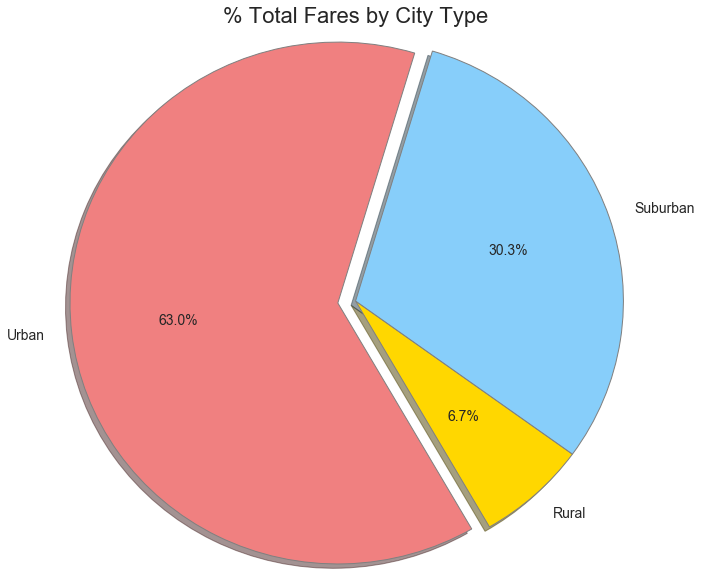

In [9]:
'''Pie chart of % of Total Fares by City Type'''

#group by city type (to be used for the first two pie charts)
type_grp = combi_df.groupby("type")

#find total fares 
type_total_fares = type_grp["fare"].sum()

#make the pie chart
pie_maker(type_total_fares, "% Total Fares by City Type")

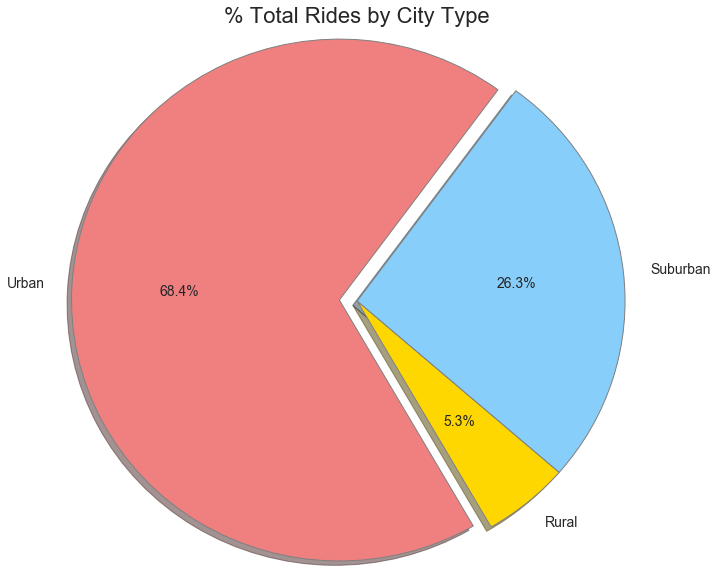

In [10]:
'''Pie Chart of % of Total Rides by City Type'''

#find total rides
type_total_rides = type_grp["ride_id"].count()

#make the pie chart
pie_maker(type_total_rides, "% Total Rides by City Type")

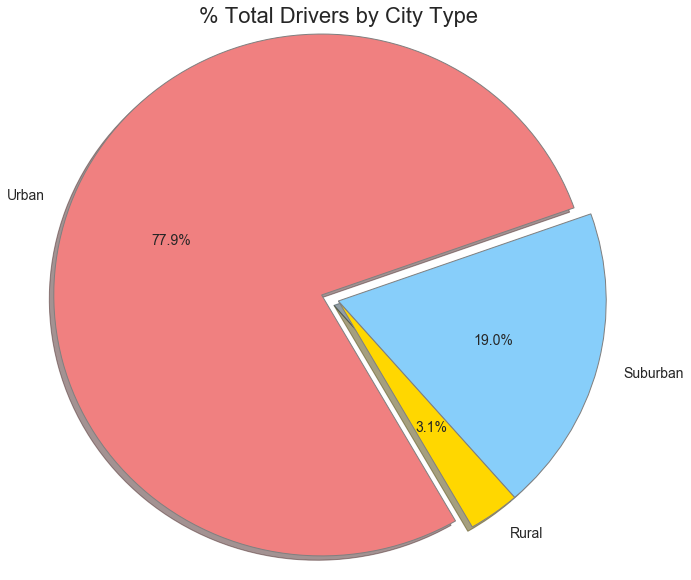

In [11]:
'''Pie Chart of % of Total Drivers by City Type'''

#make a df from combi_df, keeping only the first instance of a city
city_uniq_df = combi_df.drop_duplicates(['city'], keep='first')

#find the total drivers by grouping on city type
type_total_drivers = city_uniq_df.groupby('type').sum()['driver_count']

#make the pie chart
pie_maker(type_total_drivers, "% Total Drivers by City Type")